In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys,os
import pandas as pd
path_to_utilsGRF_="/Users/rosamartinezcorral/Dropbox (HMS)/work2/shared/utilsGRF" #GeneRegulatoryFunctions repo
sys.path.append(path_to_utilsGRF_)
import alphashape
import BoundaryFinder as BF
from brokenaxes import brokenaxes
from matplotlib.gridspec import GridSpec

In [2]:
folder="../boundaryanalysis_notebooks/ashapes"
s1="ashape_N4univ_biggergrid_3_2022_8_23.npy" #analyse_boundaries_N4univ_allregion_(biggergrid)
s2="ashape_N4univ_lowerright1_3_2022_8_23.npy" #converged. analyse_boundaries_N4univ_allregion_lowerright1_finished
s4="ashape_N4univ_topl1_3_2022_8_23.npy" #converged. Done in analyse_boundaries_N4univ_upperleft_finished
s1=np.load(os.path.join(folder,s1))
s2=np.load(os.path.join(folder,s2))
s4=np.load(os.path.join(folder,s4))

Get a boundary that encloses the region between 0-10 and 0-10:

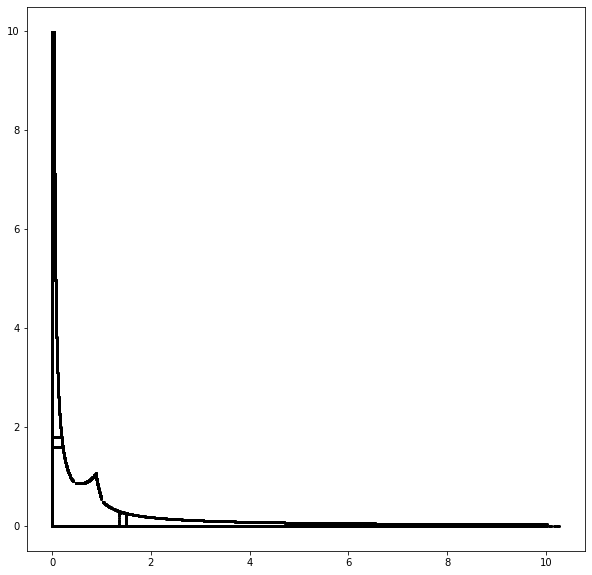

In [4]:
allpoints=[]
for s in [s1,s2,s4]:
    for i in range(len(s[0])):
        if True: #s[0][i]<10 and s[1][i]<5:
            allpoints.append((s[0][i],s[1][i]))
x=[allpoints[i][0] for i in range(len(allpoints))]
y=[allpoints[i][1] for i in range(len(allpoints))]
fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.scatter(x,y,s=4,color="k")
#ax.plot(s1[0],s1[1],color="b")
plt.show()

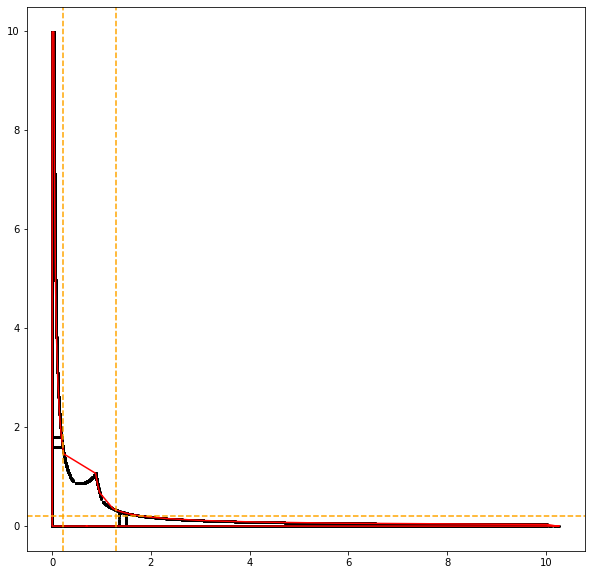

In [5]:
#getting the alphashape to work is tricky. 
ashape=alphashape.alphashape(allpoints,alpha=2) #8.5
fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.scatter(x,y,s=4,color="k")
ax.plot(ashape.exterior.xy[0],ashape.exterior.xy[1],color="r")
#ax.plot(s1[0],s1[1],color="b")
#ax.scatter(x,y,color="r",s=1)
#ax.set_xlim(0,1.2)
#ax.set_ylim(0.5,1.2)
plt.axvline(x=0.21,linestyle="--",color="orange")
plt.axvline(x=1.3,linestyle="--",color="orange")
plt.axhline(y=0.2,linestyle="--",color="orange")
plt.show()

Substitute the part of the alphashape with position between 0.21 and 1.3 and steepness greater than 0.2 by the points in s1.


In [6]:
ashape_x=ashape.exterior.xy[0]
ashape_y=ashape.exterior.xy[1]
goodpoints=[]
idx_condition=[]
c=0
for i in range(len(ashape_x)):
    x=ashape_x[i]
    y=ashape_y[i]
    condition=(x>0.21 and x<1.3 and y>0.2)
    if not condition:
        goodpoints.append((x,y))
        idx_condition.append(c)
    c+=1
        
    

In [7]:
np.where(np.diff(idx_condition)>1)

(array([6397]),)

In [8]:
middle_points=[]
for i in range(len(s1[0])):
    x=s1[0][i]
    y=s1[1][i]
    condition=(x>0.21 and x<1.3 and y>0.2)
    if condition:
    
        middle_points.append((x,y))

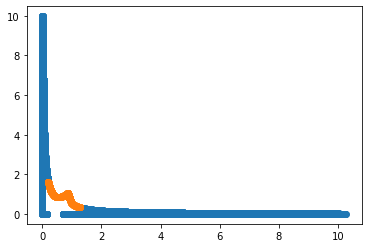

In [9]:
x=[goodpoints[i][0] for i in range(len(goodpoints))]
y=[goodpoints[i][1] for i in range(len(goodpoints))]
plt.scatter(x,y)
x=[middle_points[i][0] for i in range(len(middle_points))]
y=[middle_points[i][1] for i in range(len(middle_points))]
plt.scatter(x,y)
plt.show()

In [10]:
concatenated_points=goodpoints[0:6397]+middle_points+goodpoints[6398:]

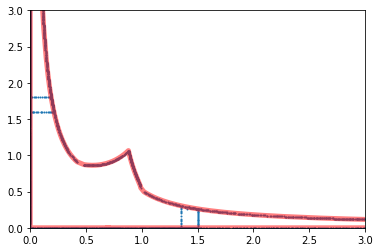

In [11]:
x=[allpoints[i][0] for i in range(len(allpoints))]
y=[allpoints[i][1] for i in range(len(allpoints))]
plt.scatter(x,y,s=1)
x=[concatenated_points[i][0] for i in range(len(concatenated_points))]
y=[concatenated_points[i][1] for i in range(len(concatenated_points))]
plt.plot(x,y,color="r",linewidth=5,alpha=0.5)
plt.xlim(0,3)
plt.ylim(0,3)
plt.show()

In [12]:
x=[concatenated_points[i][0] for i in range(len(concatenated_points))]
y=[concatenated_points[i][1] for i in range(len(concatenated_points))]
save=False
namesave="../boundaryanalysis_notebooks/ashapes/N4univ_allregion_10_10_stitched_2022_8_23.npy" #previous date was 2022_4_26
if save:
    np.save(namesave,np.vstack((np.array(x),np.array(y))))

In [13]:
ashape_1010=np.load("../boundaryanalysis_notebooks/ashapes/N4univ_allregion_10_10_stitched_2022_8_23.npy")

In [14]:
def plot_hillline(ax,nmax=1):
    nrange=np.arange(1.8,nmax+0.2,0.1)
    hillline=np.vstack([BF.position_steepness_hill(n) for n in nrange])
    #fig,ax=plt.subplots(1,1,figsize=(5,5))
    ax.plot(hillline[:,0],hillline[:,1],color='gray',linestyle='--',label='Hill line')
    for n in range(2,nmax):
        ph,sh=BF.position_steepness_hill(n)
        ax.scatter(ph,sh,color='gray')
        ax.text(ph*1.01,sh*0.98,'n=%d'%n,color='gray')
    #ax.legend()
    #ax.set_xlim(0.499,1.2)
    ax.set_xlabel('position')
    ax.set_ylabel('steepness')
    return ax

In [15]:
ashape_1010

array([[6.97610e-01, 1.76087e-01, 1.74542e-01, ..., 7.04973e-01,
        7.02348e-01, 6.97610e-01],
       [4.00000e-16, 8.00000e-16, 3.39526e-06, ..., 3.73698e-06,
        6.84550e-06, 4.00000e-16]])

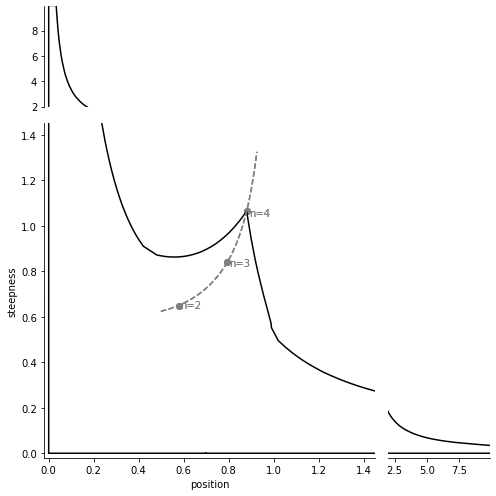

In [16]:
fig= plt.figure(figsize=(7, 7))
gs = GridSpec(4, 4,)
ax0=fig.add_subplot(gs[1:,0:3])
axtop=fig.add_subplot(gs[0,0:3])
axlow=fig.add_subplot(gs[1:4,3])

ax0.plot(ashape_1010[0],ashape_1010[1],color="k")
axlow.plot(ashape_1010[0],ashape_1010[1],color="k")
axtop.plot(ashape_1010[0],ashape_1010[1],color="k")


ax0=plot_hillline(ax0,nmax=5)

ylim00=-0.02
ylim01=1.45
xlim00=-0.02
xlim01=1.45

ylim10=2
ylim11=9.9

xlim10=2
xlim11=9.9

ax0.set_ylim(ylim00,ylim01)
ax0.set_xlim(xlim00,xlim01)
axtop.set_xlim(xlim00,xlim01)
axtop.set_ylim(ylim10,ylim11)
axlow.set_xlim(xlim10,xlim11)
axlow.set_ylim(ylim00,ylim01)
ax0=plot_hillline(ax0,nmax=5)
ax0.spines["right"].set_visible(False)
ax0.spines["top"].set_visible(False)
axtop.spines["bottom"].set_visible(False)
axtop.set_xticks([])
axtop.spines["right"].set_visible(False)
axtop.spines["top"].set_visible(False)
axlow.spines["left"].set_visible(False)
axlow.set_yticks([])
axlow.spines["right"].set_visible(False)
axlow.spines["top"].set_visible(False)
ax0.set_ylabel("steepness")
ax0.set_xlabel("position")
plt.tight_layout()
#plt.savefig("N4univ_allregion_0_10_cutaxes.pdf")
plt.show()


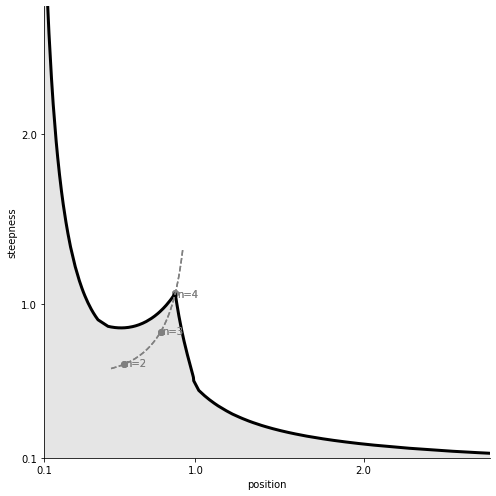

In [17]:
fig= plt.figure(figsize=(7, 7))
ax0=fig.add_subplot(1,1,1)

ax0.plot(ashape_1010[0],ashape_1010[1],color="k",linewidth=3)

ax0=plot_hillline(ax0,nmax=5)

ylim00=0.1
ylim01=2.75
xlim00=0.1
xlim01=2.75
ax0.fill(ashape_1010[0],ashape_1010[1],color="gray",alpha=0.2)


ax0.set_ylim(ylim00,ylim01)
ax0.set_xlim(xlim00,xlim01)
ax0.set_xticks([0.1,1,2])
ax0.set_yticks([0.1,1,2])

ax0=plot_hillline(ax0,nmax=5)
ax0.spines["right"].set_visible(False)
ax0.spines["top"].set_visible(False)

ax0.set_ylabel("steepness")
ax0.set_xlabel("position")
plt.tight_layout()
#plt.savefig("N4univ_allregion1.pdf")
plt.show()